### Installation des dépendances

In [2]:
%pip install numpy
%pip install -U matplotlib
import numpy as np
import matplotlib.pyplot as py
from numpy import linalg as LA
import os
import time

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\loicn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\loicn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.6 MB 1.1 MB/s eta 0:00:07
   - -------------------------------------- 0.3/7.6 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/7.6 MB 7.6 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/7.6 MB 9.1 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.6 MB 10.7 MB/s eta 0:00:01
   ------------- -------------------------- 2.7/7.6 MB 12.1 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.6 MB 12.0 MB/s eta 0:00:01
   ----------------- ---------------------- 3.3/7.6 MB 11.7 MB/s eta 0:00:01
   -------------------- ------------------- 4.0/7.6 MB 12.1 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.6 MB 13.1 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.6 MB 14.0 MB/s eta 0:00:01
   ----------------

# Transformée de KL

### Lecture des fichiers images

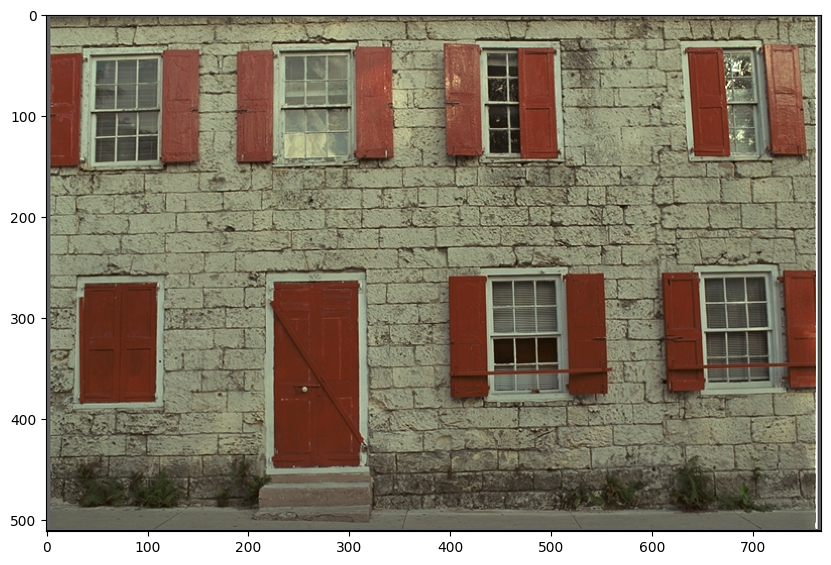

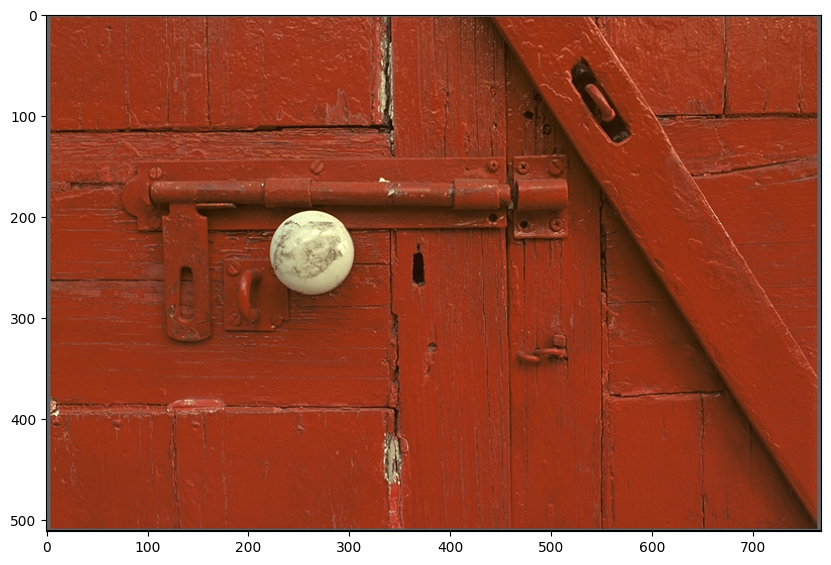

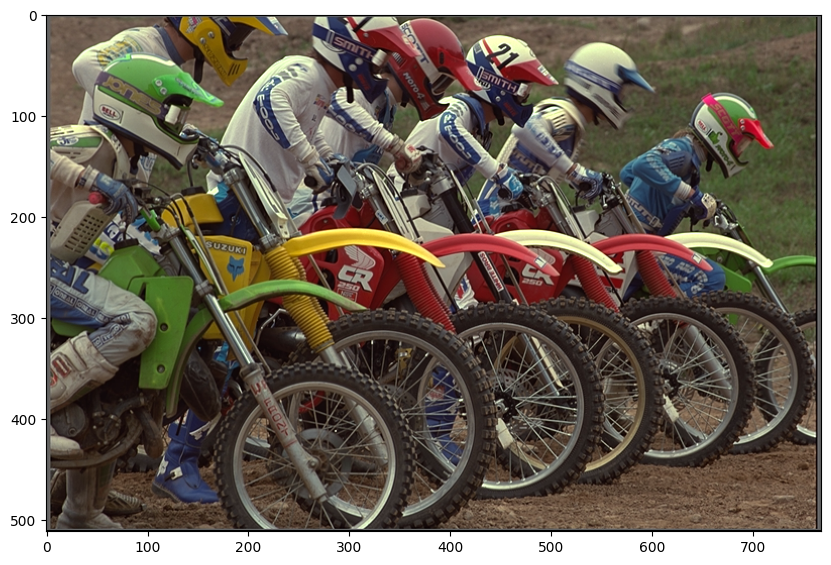

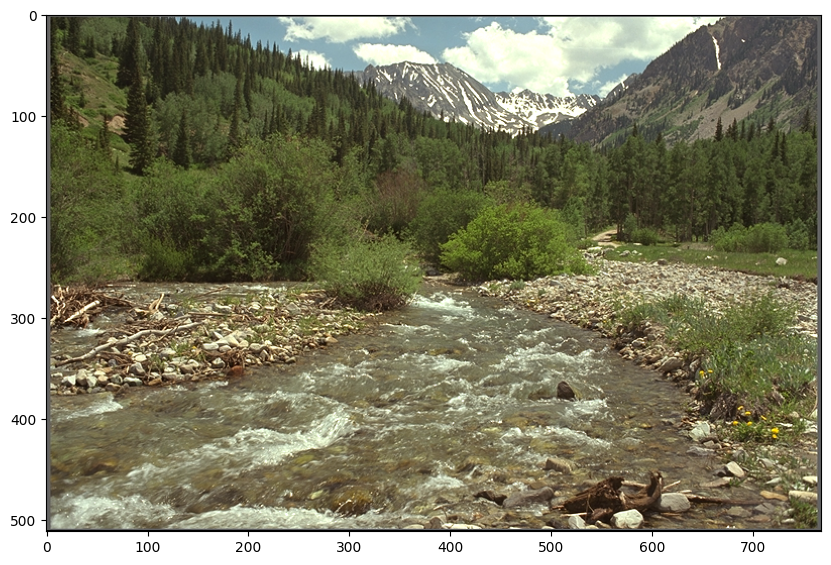

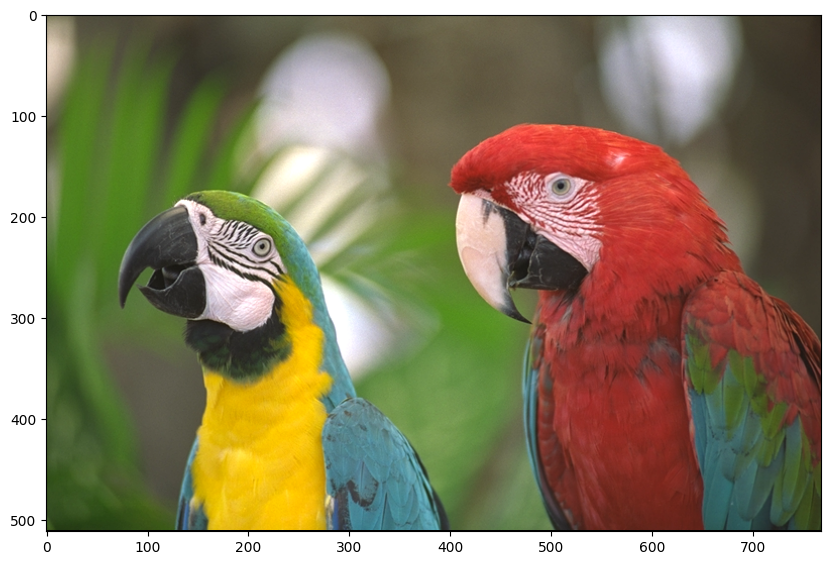

In [3]:
# Read image
dataPath = "/data/"
currDirectory = os.getcwd()
fileList = os.listdir(currDirectory + dataPath)

for file in fileList:
    imagePath = currDirectory + dataPath + file
    fig1 = py.figure(figsize = (10,10))
    img = py.imread(imagePath)
    if img is not None:
        image=img.astype('double')
        py.imshow(img)
        py.show()
   

### Implémentation de la transformée de KL 

In [ ]:
def transformeeKL(image):
    # Calcul de la moyenne
    for i in range(len(image)):
        for j in range(len(image[0])):
            sommeR=sommeR+image[i][j][0]
            sommeG=sommeG+image[i][j][1]
            sommeB=sommeB+image[i][j][2]
    nbPixels = len(image)*len(image[0])        
    MoyR= sommeR / nbPixels
    MoyG= sommeG / nbPixels
    MoyB= sommeB / nbPixels
    
    # calcul de la matrice de covariance
    covRGB = np.zeros((3,3), dtype = "double")
    for i in range(len(image)):
        for j in range(len(image[0])):
            vecTemp=[[image[i][j][0] - MoyR], [image[i][j][1]] - MoyG, [image[i][j][2] - MoyB]]
            vecProdTemp = np.dot(vecTemp,np.transpose(vecTemp))
            covRGB = np.add(covRGB,vecProdTemp)
    covRGB = covRGB / nbPixels  
    
    # Calcul des valeurs propres et vecteurs propres
    eigval, eigvec = LA.eig(covRGB)
    eigvec = np.transpose(eigvec)
    
    # retirer les axes principaux
    eigvecsansAxe0 = np.copy(eigvec)
    eigvecsansAxe0[0,:] = [0.0,0.0,0.0]
    eigvecsansAxe1 = np.copy(eigvec)
    eigvecsansAxe1[1,:] = [0.0,0.0,0.0]
    eigvecsansAxe2 = np.copy(eigvec)
    eigvecsansAxe2[2,:] = [0.0,0.0,0.0]

    imageKLsansAxe0 = np.copy(image)
    imageKLsansAxe1 = np.copy(image)
    imageKLsansAxe2 = np.copy(image)

    vecMoy =[[MoyR], [MoyG], [MoyB]] 

    for i in range(len(image)):
        for j in range(len(image[0])):
            vecTemp=[[image[i][j][0]], [image[i][j][1]], [image[i][j][2]]]
            #a=Mb
            imageKLsansAxe0[i][j][:] = np.reshape(np.dot(eigvecsansAxe0,np.subtract(vecTemp,vecMoy)),(3))
            imageKLsansAxe1[i][j][:] = np.reshape(np.dot(eigvecsansAxe1,np.subtract(vecTemp,vecMoy)),(3))
            imageKLsansAxe2[i][j][:] = np.reshape(np.dot(eigvecsansAxe2,np.subtract(vecTemp,vecMoy)),(3))  
    
    return imageKLsansAxe0, imageKLsansAxe1, imageKLsansAxe2  

### Quantification